In [48]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister, Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [39]:
def initialize():
    qreg_q = QuantumRegister(2, 'q')
    circuit = QuantumCircuit(qreg_q, name="initialize_circuit")

    circuit.h(qreg_q[1])
    circuit.h(qreg_q[0])
    
    return circuit

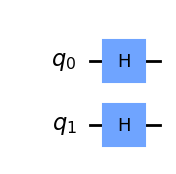

In [40]:
initialize().draw()

In [41]:
intialize = initialize().to_instruction()

In [32]:
def oracle():
    qreg_q = QuantumRegister(2, 'q')

    circuit = QuantumCircuit(qreg_q, name="oracle")

    circuit.cz(qreg_q[0], qreg_q[1])
    
    return circuit

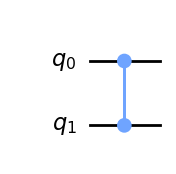

In [33]:
oracle().draw()

In [34]:
oracle = oracle().to_instruction()

In [35]:
def amplify():
    qreg_q = QuantumRegister(2, 'q')

    circuit = QuantumCircuit(qreg_q, name="amplify")

    circuit.h(qreg_q[1])
    circuit.h(qreg_q[0])
    circuit.z(qreg_q[0])
    circuit.z(qreg_q[1])
    circuit.cz(qreg_q[0], qreg_q[1])
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    
    return circuit

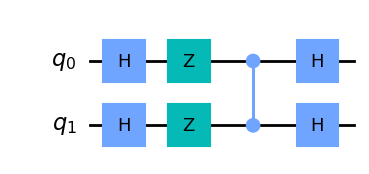

In [36]:
amplify().draw()

In [37]:
amplify = amplify().to_instruction()

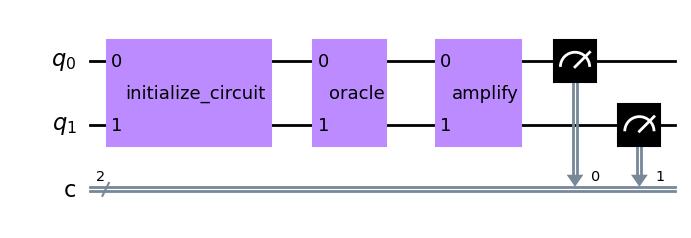

In [57]:
grover_circuit = QuantumCircuit(2,2)
grover_circuit.append(intialize, [0, 1])
grover_circuit.append(oracle, [0, 1])
grover_circuit.append(amplify, [0, 1])
grover_circuit.measure(0,0)
grover_circuit.measure(1,1)
grover_circuit.draw()

In [54]:
def execute_circuit(qc):
    # Use Aer's qasm_simulator
    backend_sim = Aer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator.
    # We've set the number of repeats of the circuit
    # to be 1024, which is the default.
    job_sim = backend_sim.run(transpile(qc, backend_sim), shots=1024)

    # Grab the results from the job.
    result_sim = job_sim.result()

    counts = result_sim.get_counts(qc)

    return counts

In [58]:
execute_circuit(grover_circuit)

{'11': 1024}